In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-who-is-more-influential-in-a-social-network/sample_predictions.csv
/kaggle/input/predict-who-is-more-influential-in-a-social-network/train.csv
/kaggle/input/predict-who-is-more-influential-in-a-social-network/test.csv


In [2]:
train=pd.read_csv("/kaggle/input/predict-who-is-more-influential-in-a-social-network/train.csv")

In [3]:
train.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [4]:
train.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,...,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,...,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,...,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,...,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,...,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,...,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,...,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,...,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


In [5]:
train.isna().sum()

Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64

In [6]:
train.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Choice               5500 non-null   int64  
 1   A_follower_count     5500 non-null   int64  
 2   A_following_count    5500 non-null   int64  
 3   A_listed_count       5500 non-null   int64  
 4   A_mentions_received  5500 non-null   float64
 5   A_retweets_received  5500 non-null   float64
 6   A_mentions_sent      5500 non-null   float64
 7   A_retweets_sent      5500 non-null   float64
 8   A_posts              5500 non-null   float64
 9   A_network_feature_1  5500 non-null   int64  
 10  A_network_feature_2  5500 non-null   float64
 11  A_network_feature_3  5500 non-null   float64
 12  B_follower_count     5500 non-null   int64  
 13  B_following_count    5500 non-null   int64  
 14  B_listed_count       5500 non-null   int64  
 15  B_mentions_received  5500 non-null   f

In [8]:
X = train.drop('Choice',axis='columns')
y = train['Choice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state= 15)

In [9]:
y_train.value_counts() #QUITE BALANCED DATASET

1    2242
0    2158
Name: Choice, dtype: int64

In [10]:
y_test.value_counts()

1    560
0    540
Name: Choice, dtype: int64

Classifier without standardization

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [12]:
clf = RandomForestClassifier(random_state=18)
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 50, 100],
                 'max_depth': [2, 5, 7, 9]
             }

In [13]:
grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=18),
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20, 50, 100]})

In [14]:
grid_clf.best_params_

{'max_depth': 9, 'n_estimators': 50}

In [15]:
rf=RandomForestClassifier(max_depth=9, n_estimators= 50)

In [16]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=50)

In [17]:
ypred = rf.predict(X_test)

In [18]:
cm=confusion_matrix(y_test, ypred)

print("Confusion Matrix for Validation set using Decision Tree classifer:\n",cm)

Confusion Matrix for Validation set using Decision Tree classifer:
 [[417 123]
 [127 433]]


Random Forest, AUC=0.8599


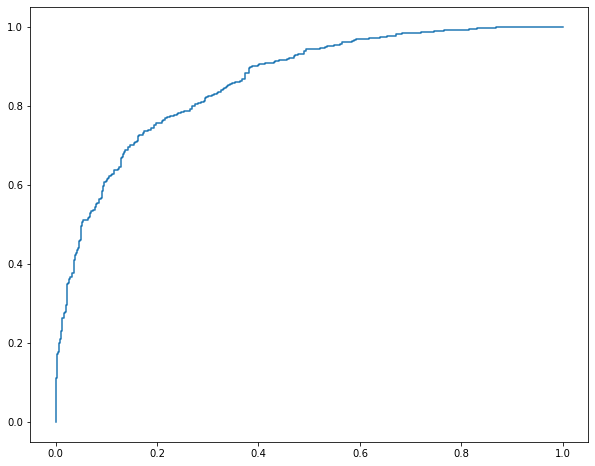

In [19]:
# Plot ROC curves - for validation set

plt.figure(figsize = (10,8))
dt_probs = rf.predict_proba(X_test)
dt_probs = dt_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, dt_probs)
auc = round(metrics.roc_auc_score(y_test, dt_probs), 4)
plt.plot(fpr,tpr)
print("Random Forest, AUC="+str(auc))

Text(0.5, 0, 'Random Forest Feature Importance')

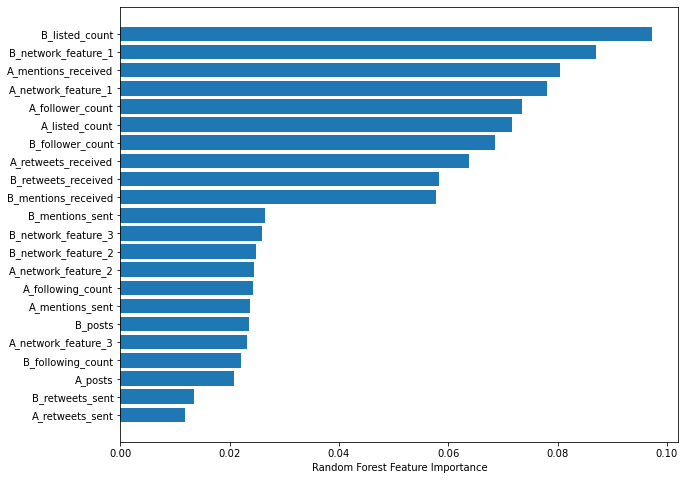

In [20]:
plt.figure(figsize = (10,8))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [21]:
print("Accuracy Score for Test set using Random Forest classifer:",round(accuracy_score(y_test, ypred),1))

Accuracy Score for Test set using Random Forest classifer: 0.8


With Standardization

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
normalized_df=(X-X.mean())/X.std()

In [24]:
normalized_df

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,-0.320219,-0.252138,-0.343123,-0.091391,-0.094229,-0.620955,-0.528464,-0.476683,-0.181912,0.784974,...,0.341023,-0.258561,-0.101207,-0.106312,0.216318,-0.398890,-0.129578,-0.193770,-0.088986,-0.331306
1,-0.309689,-0.234243,-0.330146,-0.088309,-0.091883,-0.031780,0.000646,-0.213757,-0.169234,-0.637650,...,-0.237546,-0.263408,-0.100208,-0.105781,-0.295181,-0.279339,-0.434267,-0.190148,0.440592,-0.147445
2,-0.316728,-0.233509,-0.337471,-0.090536,-0.093366,-0.068316,-0.271566,-0.300420,-0.178699,-0.152560,...,-0.244858,-0.349551,-0.101793,-0.106700,-0.564923,-0.518442,-0.458315,-0.196123,-0.700078,-0.628414
3,-0.320321,-0.258157,-0.343180,-0.091147,-0.094213,-0.491645,-0.528464,-0.341876,-0.181774,-0.795644,...,0.097868,-0.345134,-0.078989,-0.064960,2.204867,3.124530,1.163267,-0.130436,-0.576954,-0.425727
4,-0.297860,-0.240711,-0.190981,-0.086307,-0.090861,2.297307,1.164108,0.806646,-0.162946,0.409318,...,-0.220305,-0.351085,-0.100962,-0.106355,0.068348,0.006954,-0.254448,-0.193061,-0.342341,-0.317401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,-0.299745,-0.254525,-0.265091,-0.038964,-0.068418,7.436885,2.241892,5.207120,-0.067737,-0.333161,...,-0.227118,0.566916,0.172463,0.429939,1.704443,0.659463,0.458960,0.698428,-0.597053,-0.422469
5496,-0.320276,-0.253342,-0.343007,-0.091361,-0.094229,-0.620955,-0.528464,-0.463521,-0.181808,0.113332,...,-0.244918,-0.361700,-0.101810,-0.106706,-0.616591,-0.518442,-0.405867,-0.196197,-0.337655,0.221772
5497,-0.312748,-0.244568,-0.300214,-0.089491,-0.092200,0.098149,-0.402066,-0.141267,-0.175003,0.650407,...,-0.220305,-0.351085,-0.100962,-0.106355,0.068348,0.006954,-0.254448,-0.193061,-0.342341,-0.317401
5498,-0.189584,-0.254036,-0.311518,-0.069744,-0.052462,-0.057868,-0.528464,-0.086975,-0.092058,-0.778096,...,0.496713,1.001865,-0.094786,-0.102207,0.077040,0.123117,-0.264918,-0.170244,1.399519,0.620341


In [25]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df, y, stratify=y, test_size=0.20, random_state= 15)

In [26]:
clf = RandomForestClassifier(random_state=18)
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 50, 100],
                 'max_depth': [2, 5, 7, 9]
             }

In [27]:
grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=18),
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20, 50, 100]})

In [28]:
grid_clf.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [29]:
rf=RandomForestClassifier(max_depth=7, n_estimators= 100)

In [30]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7)

In [31]:
ypred = rf.predict(X_test)

In [32]:
cm=confusion_matrix(y_test, ypred)

In [33]:
print("Confusion Matrix for Validation set using RF classifer STANDARDIZED DATA:\n",cm)

Confusion Matrix for Validation set using RF classifer STANDARDIZED DATA:
 [[418 122]
 [135 425]]


Random Forest, AUC=0.8596


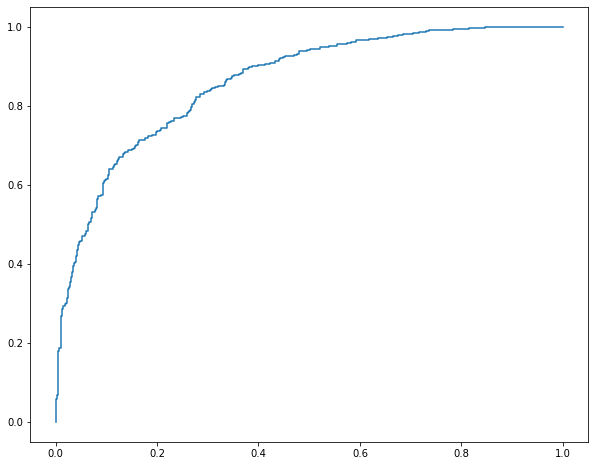

In [34]:
plt.figure(figsize = (10,8))
dt_probs = rf.predict_proba(X_test)
dt_probs = dt_probs[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, dt_probs)
auc = round(metrics.roc_auc_score(y_test, dt_probs), 4)
plt.plot(fpr,tpr)
print("Random Forest, AUC="+str(auc))

Text(0.5, 0, 'Random Forest Feature Importance')

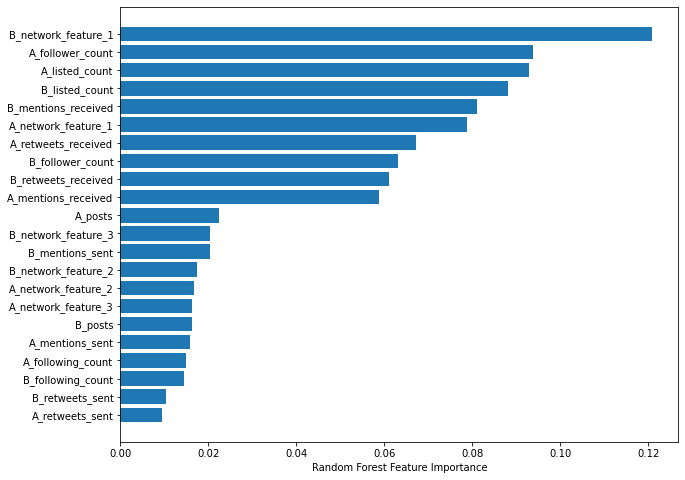

In [35]:
plt.figure(figsize = (10,8))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [36]:
print("Accuracy Score for Test set using Random Forest classifer:",round(accuracy_score(y_test, ypred),2))

Accuracy Score for Test set using Random Forest classifer: 0.77


Both, with and without standardization RF classifiers have the same accuracy.

4 most indicative features of being an influencer are:
1. Listed Count
2. Follower Count
3. Mentions Received
4. Retweets Recieved

Followed by :

5. Number of Posts
6. Mentions Sent
7. Following Count
8. Retweets Sent